# Курсовая работа по теме  "Классификация паролей пользователей по стойкости к взлому"

# 1. Подготовительный этап

Отключим предупреждения, выводимые при выполнении кода, так как они занимают много места и визуально мешают

In [185]:
import warnings
warnings.filterwarnings('ignore')

**Импортируем датасет в pandas.dataFrame**

In [186]:
import pandas as pd
df = pd.read_csv("data.csv", index_col=0)
df

,password,strength
0,6q5qrdopq,1
1,sweety4,0
2,ipeni773,1
3,ball2529,1
4,ogegum317,1
...,...,...
23805,kv25on94,1
23806,torbay12,1
23807,kimthoa12345,1
23808,EEEEEEEEE,0


**Импортируем датасет в pandas.dataFrame**

**Очистка датасета от возможных отсутствующих значений.**\
**Если найдутся строки, где хотя бы одно значение NaN, они будут удалены, так как в данном датасете всего два столбца, и записи, в которых отсутствует пароль и/или его стойкость к взлому, нам не потребуются.**

In [189]:
print(len(df))
print(len(df[df['password'].isnull()]))
print(len(df[df['strength'].isnull()]))

23810
0
0


**Атрибут password - строковое представление пароля.**\
**Основная его характеристика - количество символов.**

**Атрибут strength - стойкость пароля ко взлому:**\
**0 - слабый (относительно легко взломать)**\
**1 - средний (стойкость средняя)**\
**2 - сильный (взломать сложно)**

**Добавим в датасет следующие признаки:**

**length - длина пароля (количество символов)**\
**digit - признак, отвечающий за содержание цифр в пароле (0 - нет, 1 - да)**\
**lower & upper - содержит ли пароль одновременно заглавные и строчные буквы (0 - нет, 1 - да)**\
**other_symbols - содержит ли пароль особые символы (0 - нет, 1 - да)**\
**distinct_symbols - сколько различных символов содержит пароль**

In [190]:
df['length'] = df["password"].str.len()

In [191]:
def is_digit_in_password(password1):
    password = str(password1)
    for x in password:
        if x in "0123456789":
            return 1
    return 0
df["digit"] = df.apply(lambda x: is_digit_in_password(x["password"]), axis=1)

In [192]:
def lower_upper(password1):
    password = str(password1)
    if not(password.lower() == password or password.upper() == password):
        return 1
    return 0
df["lower & upper"] = df.apply(lambda x: lower_upper(x["password"]), axis=1)

In [193]:
def other_symbols(password1):
    password = str(password1)
    for x in password:
        if x not in "0123456789" and x not in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" and x not in "ABCDEFGHIJKLMNOPQRSTUVWXYZ".lower():
            return 1
    return 0
df["other_symbols"] = df.apply(lambda x: other_symbols(x["password"]), axis=1)

In [194]:
def distinct_symbols(password1):
    password = str(password1)
    c = 0
    p = ""
    for x in password:
        if x not in p:
            c += 1
            p += x
    return c
df["distinct_symbols"] = df.apply(lambda x: distinct_symbols(x["password"]), axis=1)

# 2. Анализ данных

**Для наглядности выведем на экран 20 случайных записей нашего dataframe**

In [195]:
df.sample(n=20)

,password,strength,length,digit,lower & upper,other_symbols,distinct_symbols
7262,318251871/london,2,16,1,0,1,11
16298,zxcvbnm123321,1,13,1,0,0,10
23144,villa15,0,7,1,0,0,6
20028,gsgsgs1,0,7,1,0,0,3
2152,josehaccp1,1,10,1,0,0,9
18003,vishal91,1,8,1,0,0,8
3797,kapan031,1,8,1,0,0,7
13987,qtdxwu2,0,7,1,0,0,7
21697,mam1ron1,1,8,1,0,0,6
1704,еееееееееее,0,11,0,0,1,1


**Признак strength - стойкость пароля ко взлому по шкале от 0 до 2.**

**Изобразим на круговой диаграмме частотность каждой из оценки частотности паролей:**

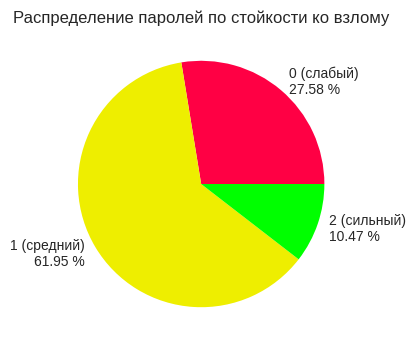

In [196]:
import matplotlib.pyplot as plt

d0 = len(df[df["strength"] == 0]) / len(df) * 100
d1 = len(df[df["strength"] == 1]) / len(df) * 100
d2 = len(df[df["strength"] == 2]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1, d2]
labels = ['''0 (слабый)
{} %'''.format(round(d0, 2)), 
          '''1 (средний)
{} %'''.format(round(d1, 2)), 
          '''2 (сильный)
{} %'''.format(round(d2, 2))]
colors = ["#F04", "#EE0", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по стойкости ко взлому")
plt.show()

**Данная диаграмма показывает, что датасет в некоторой степени несбалансирован по классам.**

**Признак digit отвечает за содержание цифр в пароле (0 - нет, 1 - да).**

**Изобразим на круговой диаграмме частотность паролей с цифрами и без соответственно:**

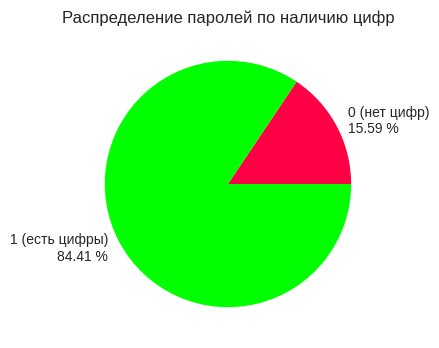

In [197]:
d0 = len(df[df["digit"] == 0]) / len(df) * 100
d1 = len(df[df["digit"] == 1]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1]
labels = ['''0 (нет цифр)
{} %'''.format(round(d0, 2)), 
          '''1 (есть цифры)
{} %'''.format(round(d1, 2))]
colors = ["#F04", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по наличию цифр")
plt.show()

**Признак lower & upper - содержит ли пароль одновременно заглавные и строчные буквы (0 - нет, 1 - да)**

**Изобразим на круговой диаграмме частотность паролей с буквами разных регистров и без них:**

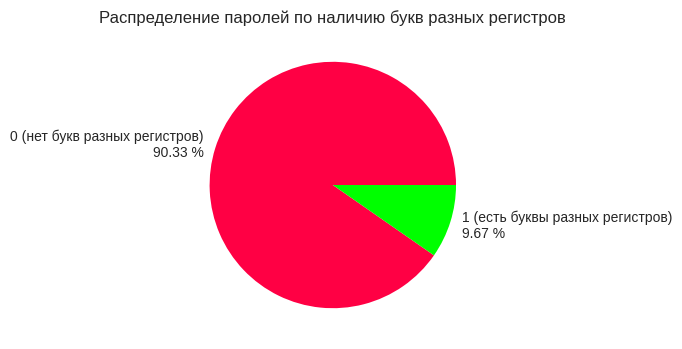

In [198]:
d0 = len(df[df["lower & upper"] == 0]) / len(df) * 100
d1 = len(df[df["lower & upper"] == 1]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1]
labels = ['''0 (нет букв разных регистров)
{} %'''.format(round(d0, 2)), 
          '''1 (есть буквы разных регистров)
{} %'''.format(round(d1, 2))]
colors = ["#F04", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по наличию букв разных регистров")
plt.show()

**Признак other symbols - содержит ли пароль особые символы (0 - нет, 1 - да).**

**Изобразим на круговой диаграмме доли паролей с особыми символами и без них соответственно**

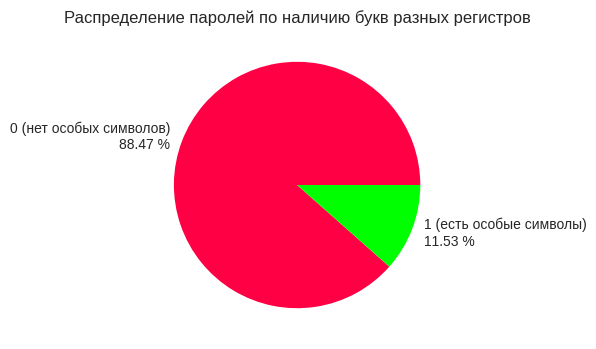

In [199]:
d0 = len(df[df["other_symbols"] == 0]) / len(df) * 100
d1 = len(df[df["other_symbols"] == 1]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1]
labels = ['''0 (нет особых символов)
{} %'''.format(round(d0, 2)), 
          '''1 (есть особые символы)
{} %'''.format(round(d1, 2))]
colors = ["#F04", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по наличию букв разных регистров")
plt.show()

**Признак length - длина пароля (количество символов).**\
**Признак distinct_symbols - количество уникальных символов пароля.**

In [200]:
print(df["length"].min(), df["length"].max())

3 64


In [201]:
print(df["distinct_symbols"].min(), df["distinct_symbols"].max())

1 43


**Минимальная длина паролей из выборки - 1, а максимальная - 200.**\
**Минимальное количество уникальных символов паролей из выборки - 1, амаксимальная - 60.**\

**Отобразим частотность использования длин паролей на диаграмме рассеяния**

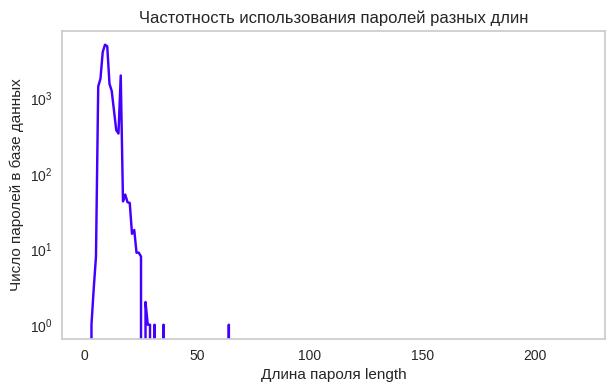

In [202]:
import matplotlib.pyplot as plt

length_count = list(map(lambda x: len(df[df["length"] == x]), [x for x in range(1, 221)]))
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
plt.title("Частотность использования паролей разных длин")
plt.xlabel("Длина пароля length")
plt.ylabel("Число паролей в базе данных")
ax.semilogy([x for x in range(1, 221)], length_count, color="#40F")
ax.grid()

**По графику видно, что наиболее популярны пароли длиной около 10 символов, а пароли длиной более 60-70 символов являются аномалиями и встречаются в единичных случаях. Тем не менее, эти аномалии недостаточно велики, чтобы повлиять на статистические показатели (среднее арифметическое, медиана, мода и другие) огромной выборки.
Поэтому выбрасывать их из датасета не имеет смысла.**

In [203]:
print(length_count.index(max(length_count)) + 1)

9


**Самое популярное значение длины пароля: 9.**

**Для большей наглядности построим ещё столбчатую диаграмму и график:**

In [204]:
def probability(length):
    c = sum(length_count[1:length + 1]) / len(df)
    return c
probability_list = list(map(lambda x: probability(x), [x for x in range(1, 221)]))

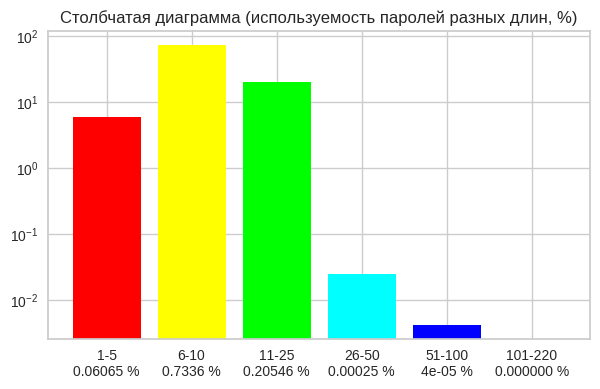

In [205]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
plt.title("Столбчатая диаграмма (используемость паролей разных длин, %)")
v1 = probability(5) - probability(0)
v2 = probability(10) - probability(5)
v3 = probability(25) - probability(10)
v4 = probability(50) - probability(25)
v5 = probability(100) - probability(50)
v6 = probability(220) - probability(100)
values = [100 * x for x in [v1, v2, v3, v4, v5, v6]]
labels = ["1-5\n{} %".format(round(v1, 5)), 
          "6-10\n{} %".format(round(v2, 5)), 
          "11-25\n{} %".format(round(v3, 5)), 
          "26-50\n{} %".format(round(v4, 5)), 
          "51-100\n{} %".format(round(v5, 5)), 
          "101-220\n{} %".format(format(v6, "f"))] 
ax.set_yscale('log')
colors = ["#F00", "#FF0", "#0F0", "#0FF", "#00F", "#F0F"]
plt.bar(labels, values, color=colors)
plt.show()

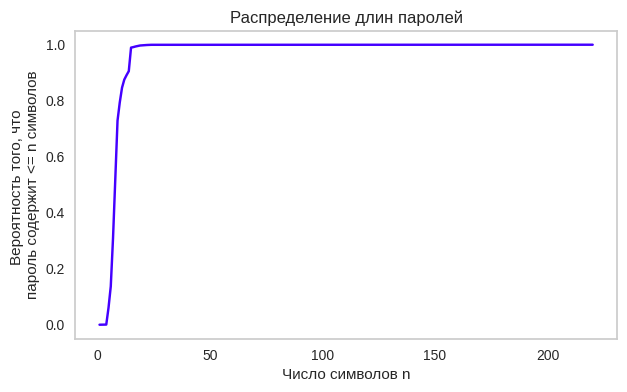

In [352]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
plt.title("Распределение длин паролей")
plt.xlabel("Число символов n")
plt.ylabel('''Вероятность того, что 
пароль содержит <= n символов''')
ax.plot([x for x in range(1, 221)], probability_list, color="#40F")
ax.grid()

**Из этих двух графиков мы можем увидеть, что основную массу (>99%) составляют пароли длиной до 25 символов включительно.**

# 3. Построение простых моделей

## Модель I (логистическая регрессия)

**В этой модели мы будем использовать логистическую регрессию - один из алгоритмов классификации. Рассмотрим несколько случаев с разным набором факторов.**

**Случай 1**\
**В качестве факторов мы выберем все 4 атрибута пароля: длина, наличие цифр, букв разного регистра, специальных символов и количество уникальных символов**

**Выделим целевую переменную и факторы**

In [207]:
from sklearn.model_selection import train_test_split
X = df.drop("strength", axis=1).drop("password", axis=1)
Y = df.strength

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [209]:
logistic = LogisticRegression(class_weight='balanced')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)

**При построении моделей я буду использовать кривую обучения из библиотеки yellowbrick. Это нужно для того, чтобы найти оптимальный объём тестовой выборки и избежать недообучения/переобучения.**

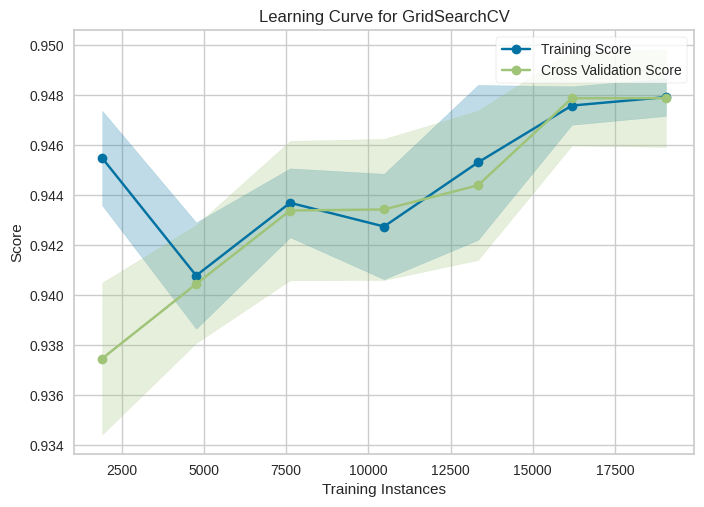

In [210]:
from yellowbrick.model_selection import LearningCurve
import numpy as np
visualizer = LearningCurve(
    clf, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [211]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [212]:
%%time
clf.fit(X_train, Y_train)

CPU times: user 6.29 s, sys: 15.8 ms, total: 6.3 s
Wall time: 6.38 s


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [213]:
Y_pred = clf.predict(X_test)

**Вычислим матрицу ошибок и f1-score для этой модели**\
**(f1-score будет использоваться для сравнения моделей)**

In [214]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.f1_score(Y_test, Y_pred, average='macro'))

[[ 877  106    1]
 [  62 2125   11]
 [   0    0  390]]
0.9521831752803765


# 4. Сравнение и анализ моделей

**Случай 2**\
**В качестве фактора возьмём один - длина пароля в символах.**

**Выделим целевую переменную и факторы**

In [215]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1).drop("distinct_symbols", axis=1)
Y = df.strength

In [216]:
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)

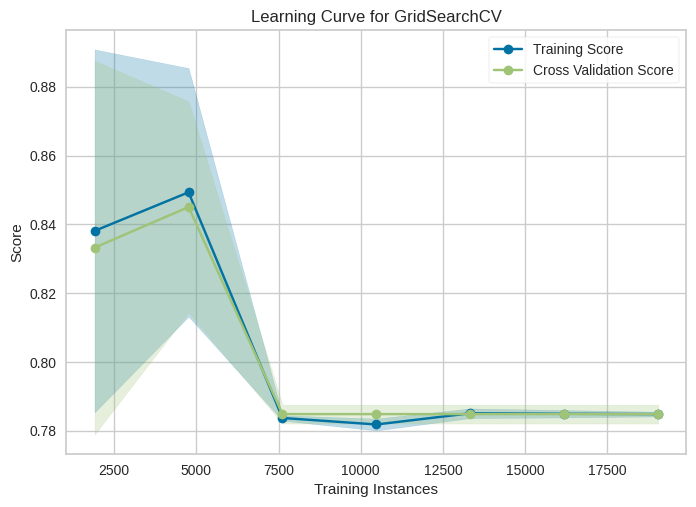

In [217]:
visualizer = LearningCurve(
    clf, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [218]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.75)

In [219]:
%%time
clf.fit(X_train, Y_train)

CPU times: user 1.02 s, sys: 2 ms, total: 1.02 s
Wall time: 1.02 s


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [220]:
Y_pred = clf.predict(X_test)

In [221]:
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.f1_score(Y_test, Y_pred, average='macro'))

[[ 1070  3505   354]
 [    0 11084     0]
 [    0     0  1845]]
0.7108880917999395


**Случай 3**\
**Попробуем в качестве фактора использовать наличие цифр**

In [222]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1).drop("distinct_symbols", axis=1)
Y = df.strength

In [223]:
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)

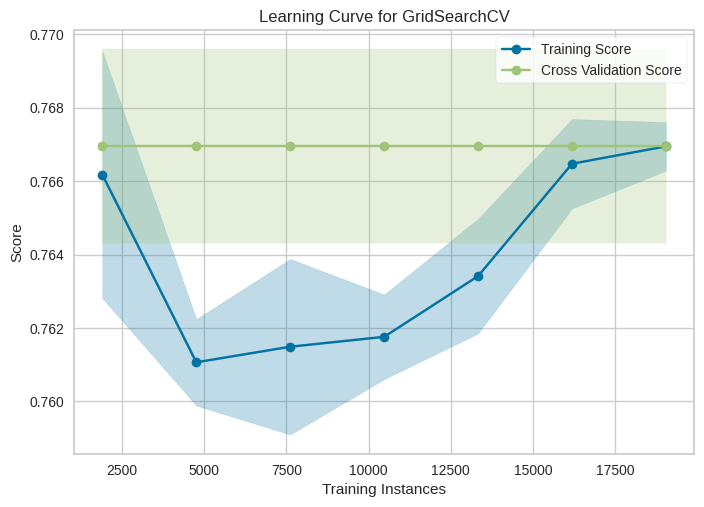

In [224]:
visualizer = LearningCurve(
    clf, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [225]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [226]:
%%time
clf.fit(X_train, Y_train)

CPU times: user 2.45 s, sys: 7.01 ms, total: 2.45 s
Wall time: 2.45 s


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [227]:
Y_pred = clf.predict(X_test)

In [228]:
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.f1_score(Y_test, Y_pred, average='macro'))

[[ 543  467    0]
 [  11 2171    0]
 [   1  379    0]]
0.509696773423086


**Случай 4**\
**Попробуем в качестве фактора использовать наличие букв разных регистров**

In [229]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("digit", axis=1).drop("other_symbols", axis=1).drop("distinct_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [230]:
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)

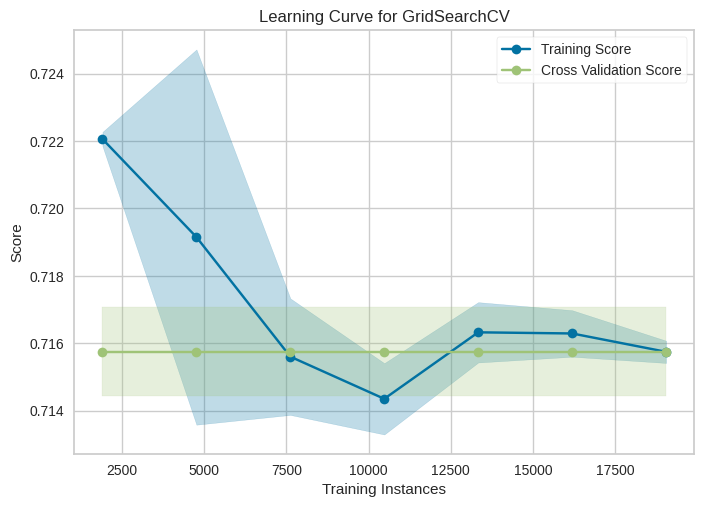

In [231]:
visualizer = LearningCurve(
    clf, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [232]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [233]:
%%time
clf.fit(X_train, Y_train)

CPU times: user 634 ms, sys: 1.01 ms, total: 635 ms
Wall time: 637 ms


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [234]:
Y_pred = clf.predict(X_test)

In [235]:
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.f1_score(Y_test, Y_pred, average='macro'))

[[   0 1940    0]
 [   0 4475    1]
 [   0   53  674]]
0.5930944341556061


**Случай 5**\
**Попробуем в качестве фактора использовать наличие специальных символов**

In [236]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("distinct_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [237]:
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)

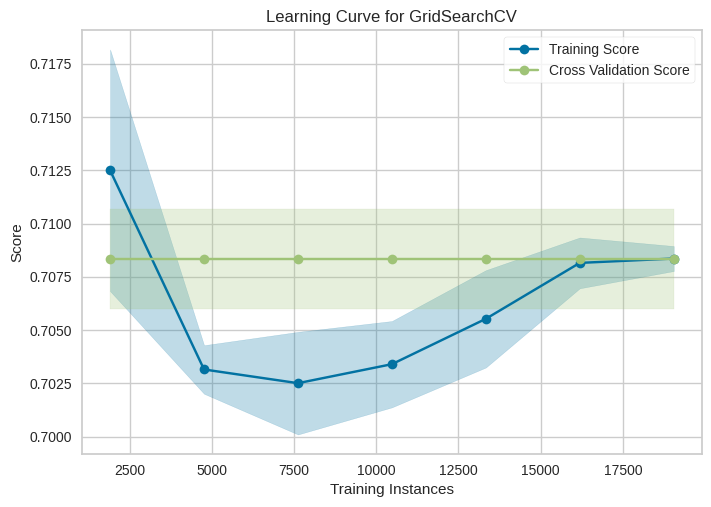

In [238]:
visualizer = LearningCurve(
    clf, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [239]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [240]:
%%time
clf.fit(X_train, Y_train)

CPU times: user 2.29 s, sys: 1.9 ms, total: 2.3 s
Wall time: 2.31 s


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [241]:
Y_pred = clf.predict(X_test)

In [242]:
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.f1_score(Y_test, Y_pred, average='macro'))

[[ 301  637    0]
 [  25 2200    0]
 [  57  352    0]]
0.4228077205842257


**Случай 6**\
**Попробуем в качестве фактора использовать количество уникальных символов пароля**

In [243]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1)
Y = df.strength

In [244]:
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)

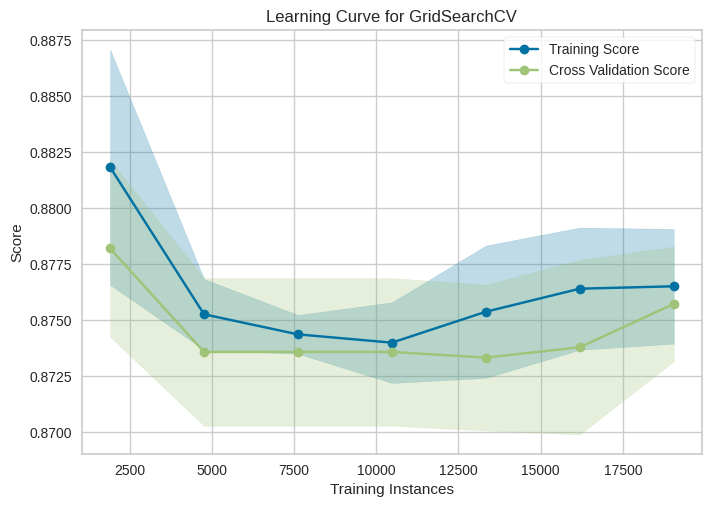

In [245]:
visualizer = LearningCurve(
    clf, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [247]:
%%time
clf.fit(X_train, Y_train)

CPU times: user 3.27 s, sys: 7.03 ms, total: 3.27 s
Wall time: 3.27 s


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [248]:
Y_pred = clf.predict(X_test)

In [249]:
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.f1_score(Y_test, Y_pred, average='macro'))

[[ 698  288    0]
 [  93 2059   44]
 [   0   37  353]]
0.8605992814423297


**В случаях 2-5 собой однофакторную классификацию с факторами length, lower & upper, digit, other_symbols и distinct_symbols соответственно.**

**В случаях 2 и 6 классификация работает на наборе данных лучше, чем в остальных - это можно увидеть как по метрике f1_score, так и по матрице ошибок (хотя и в этих случаев модель требует улучшений и ещё непригодна для использования).**\
**Рассмотрим комбинацию случаев 2 и 6, где в качестве факторов используются длина пароля и количество его уникальных символов:**

**Случай 7**\
**Попробуем в качестве факторов использовать длину пароля и количество уникальных символов**

In [251]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1)
Y = df.strength

In [252]:
logistic = LogisticRegression(class_weight='balanced')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)

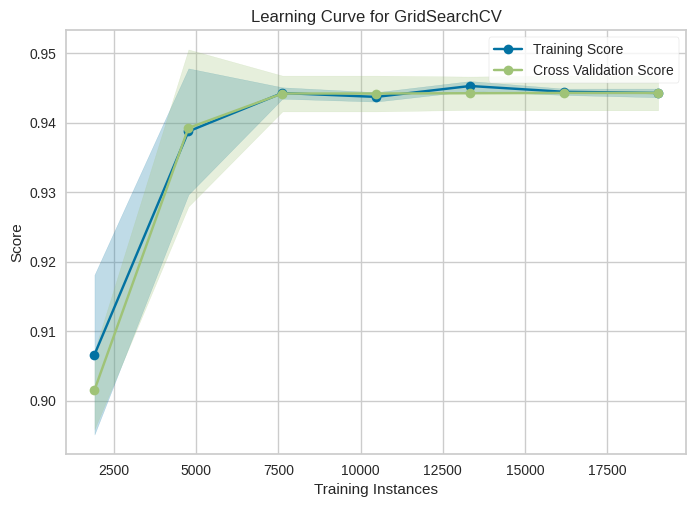

In [253]:
visualizer = LearningCurve(
    clf, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [254]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [255]:
%%time
clf.fit(X_train, Y_train)

CPU times: user 4.82 s, sys: 8.9 ms, total: 4.83 s
Wall time: 4.87 s


GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'solver': ('liblinear', 'sag', 'saga')})

In [256]:
Y_pred = clf.predict(X_test)

In [257]:
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.f1_score(Y_test, Y_pred, average='macro'))

[[ 858   99    2]
 [  62 2165    3]
 [   0    0  383]]
0.9567578478078896


**Теперь изобразим f1-score для каждого случая, время обучения модели и найдём оптимальный из этих случаев**

In [261]:
pd.DataFrame.from_dict({"Случай": [1, 2, 3, 4, 5, 6, 7],
                       "Время обучения": [6.38, 1.02, 2.45, 0.64, 2.31, 3.27, 4.27],
                       "f1-score": [0.9522, 0.7109, 0.5097, 0.5931, 0.4228, 0.8606, 0.9568]})

,Случай,Время обучения,f1-score
0,1,6.38,0.9522
1,2,1.02,0.7109
2,3,2.45,0.5097
3,4,0.64,0.5931
4,5,2.31,0.4228
5,6,3.27,0.8606
6,7,4.27,0.9568


# 5. Выводы

**Лучшие результаты по f1-score показали случаи 2 и 7, последний немного выигрывает как по времени, так и по времени обучения.**\
**Для последующих моделей я возьму случай 7.**

# 6. Построение моделей с учётом выводов

## Модель II (метод ближайших соседей)

In [262]:
from sklearn.neighbors import KNeighborsRegressor

X = df.drop("password", axis=1).drop("strength", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1)
Y = df.strength

In [263]:
regressor_n = KNeighborsRegressor()
parameters = [{'n_neighbors': [2, 5, 10], 'weights': ['uniform','distance']}]
clf2 = GridSearchCV(regressor_n, parameters)

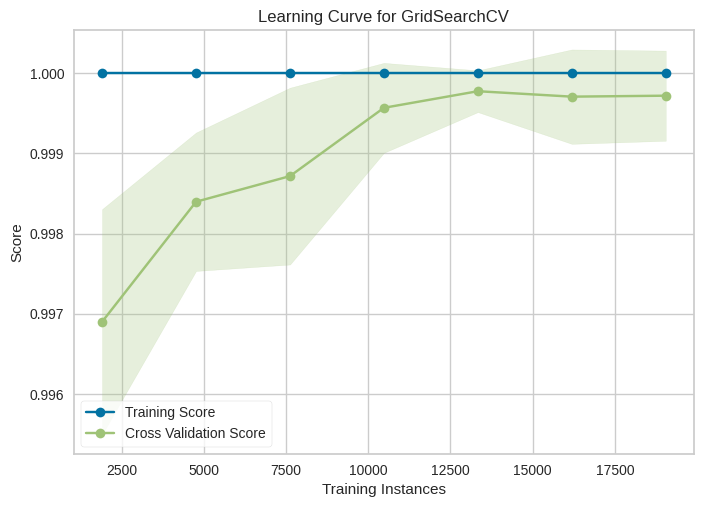

In [264]:
visualizer = LearningCurve(
    clf2, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [265]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [266]:
%%time
clf2.fit(X_train, Y_train)

CPU times: user 1.59 s, sys: 4 ms, total: 1.59 s
Wall time: 2.25 s


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 5, 10],
                          'weights': ['uniform', 'distance']}])

In [267]:
Y_pred = clf2.predict(X_test)

In [273]:
from sklearn.model_selection import cross_val_score
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))
print(metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average="macro"))

[[1006    0    0]
 [   0 2192    0]
 [   0    0  374]]
1.0


## Модель III (метод опорных векторов)

In [274]:
from sklearn.svm import SVC

In [275]:
svc = SVC()
parameters = {'C':[1,10,100,1000]}
clf3 = GridSearchCV(svc, parameters)

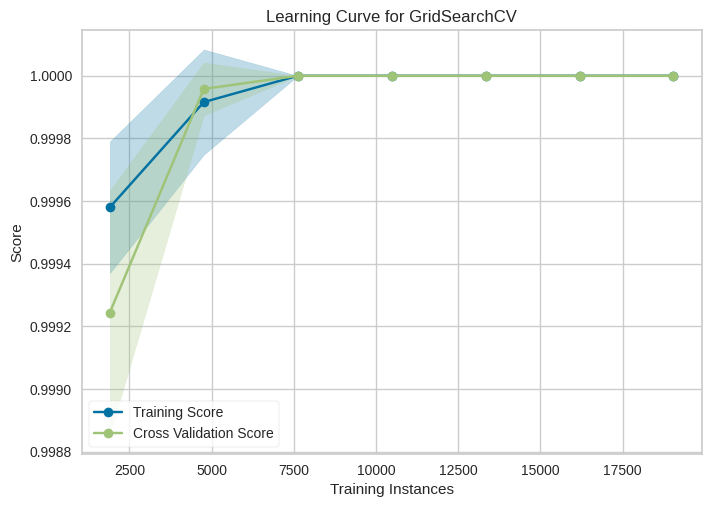

In [276]:
visualizer = LearningCurve(
    clf3, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [277]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6)

In [278]:
%%time
clf3.fit(X_train, Y_train)

CPU times: user 977 ms, sys: 3.96 ms, total: 981 ms
Wall time: 979 ms


GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10, 100, 1000]})

In [279]:
Y_pred = clf3.predict(X_test)

In [280]:
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))
print(metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average="macro"))

[[3960    0    0]
 [   0 8871    0]
 [   0    0 1455]]
1.0


## Модель IV (классификатор дерева решений)

In [281]:
from sklearn.tree import DecisionTreeRegressor

In [282]:
regressor = DecisionTreeRegressor()
parameters = {"splitter": ["best", "random"]}
clf4 = GridSearchCV(regressor, parameters)

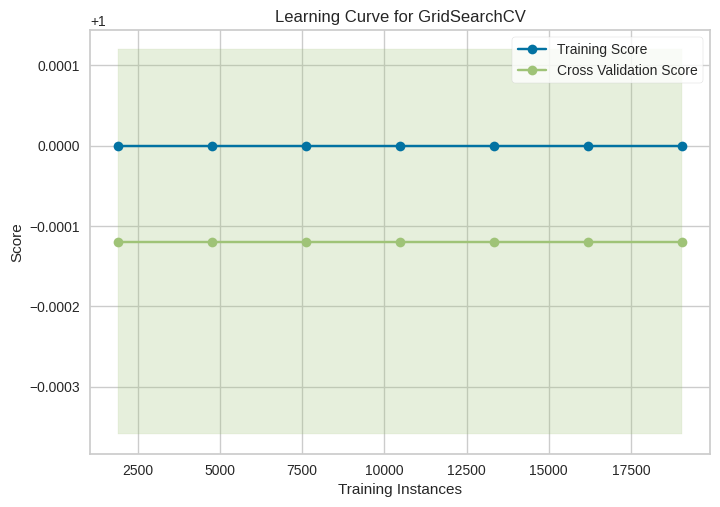

In [283]:
visualizer = LearningCurve(
    clf4, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [284]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [285]:
%%time
clf4.fit(X_train, Y_train)

CPU times: user 72.9 ms, sys: 0 ns, total: 72.9 ms
Wall time: 75.1 ms


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'splitter': ['best', 'random']})

In [286]:
Y_pred = clf4.predict(X_test)

In [287]:
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))
print(metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average="macro"))

[[1020    0    0]
 [   0 2181    0]
 [   0    0  371]]
1.0


## Модель V (метод Случайный лес (Random Forests))

In [288]:
from sklearn.ensemble import RandomForestClassifier

In [289]:
rfc = RandomForestClassifier()
parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2']
}
clf5 = GridSearchCV(rfc, parameters)

In [291]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [292]:
%%time
clf5.fit(X_train, Y_train)

CPU times: user 54.5 s, sys: 173 ms, total: 54.7 s
Wall time: 55.5 s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [293]:
Y_pred = clf5.predict(X_test)

In [294]:
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))
print(metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average="macro"))

[[ 996    0    0]
 [   0 2218    0]
 [   0    0  358]]
1.0


## Модель VI (наивный байесовский метод (Naive Bayes))

In [295]:
from sklearn.naive_bayes import MultinomialNB

In [296]:
multi = MultinomialNB(class_prior=[0.3, 0.6, 0.1])
parameters = { 
    'fit_prior': [True, False]}
clf6 = GridSearchCV(multi, parameters)

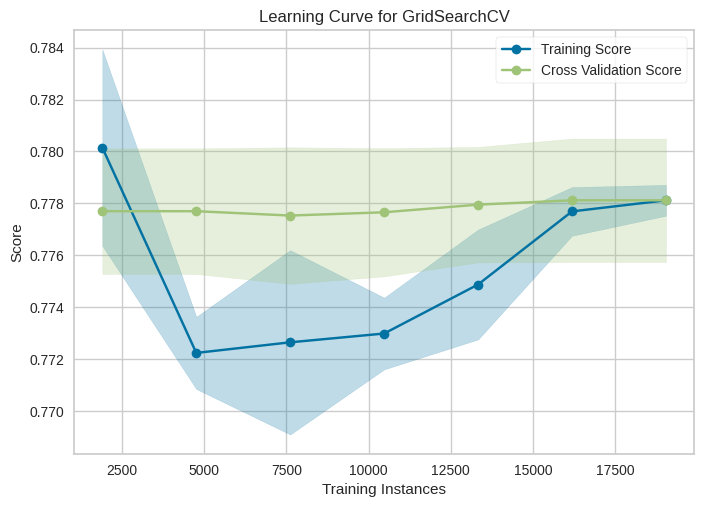

In [303]:
visualizer = LearningCurve(
    clf6, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show()

In [327]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [328]:
%%time
clf6.fit(X_train, Y_train)

CPU times: user 109 ms, sys: 0 ns, total: 109 ms
Wall time: 116 ms


GridSearchCV(estimator=MultinomialNB(class_prior=[0.3, 0.6, 0.1]),
             param_grid={'fit_prior': [True, False]})

In [329]:
Y_pred = clf6.predict(X_test)

In [330]:
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))
print(metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average="macro"))

[[ 612  394    0]
 [  11 2165    0]
 [   0  390    0]]
0.5320864214167004


## Модель VII (нелинейная классификация)

In [308]:
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
parameters = {'C':[1,10,100,1000]}
clf7 = GridSearchCV(svm_rbf, parameters)

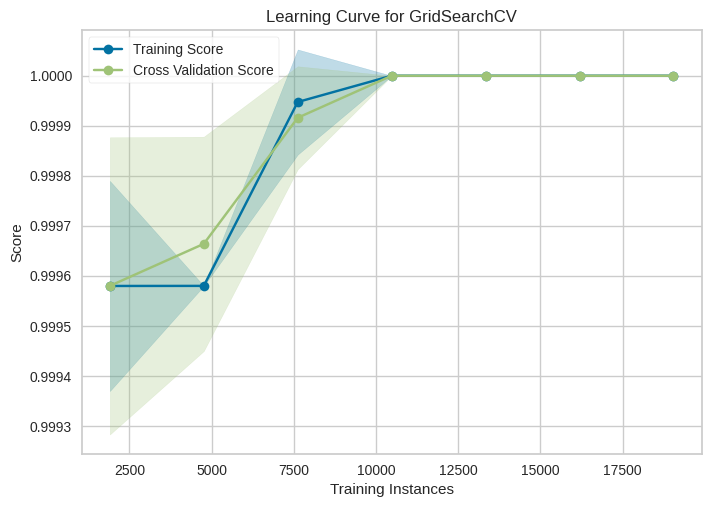

In [309]:
visualizer = LearningCurve(
    clf7, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [331]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.45)

In [332]:
%%time
clf7.fit(X_train, Y_train)

CPU times: user 1.68 s, sys: 2.99 ms, total: 1.68 s
Wall time: 1.69 s


GridSearchCV(estimator=SVC(C=10.0, gamma=0.1, random_state=1),
             param_grid={'C': [1, 10, 100, 1000]})

In [333]:
Y_pred = clf7.predict(X_test)

In [334]:
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))
print(metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average="macro"))

[[3010    0    0]
 [   0 6614    0]
 [   0    0 1091]]
1.0


**Найдём cross_val_score для каждой из моделей**

**Модель I**

In [324]:
from sklearn.model_selection import cross_val_score
clf_scores1 = cross_val_score(clf, X, Y, cv=2, scoring = 'accuracy')
print(clf_scores1.mean())

0.9317933641327174


**Модель II**

In [326]:
clf_scores2 = cross_val_score(clf2, X, Y, cv=2)
print(clf_scores2.mean())

0.999619605448375


**Модель III**

In [319]:
clf_scores3 = cross_val_score(clf3, X, Y, cv=2)
print(clf_scores3.mean())

1.0


**Модель IV**

In [320]:
clf_scores4 = cross_val_score(clf4, X, Y, cv=2)
print(clf_scores4.mean())

0.9997607467900169


**Модель V**

In [321]:
clf_scores5 = cross_val_score(clf5, X, Y, cv=2)
print(clf_scores5.mean())

1.0


**Модель VI**

In [322]:
clf_scores6 = cross_val_score(clf6, X, Y, cv=2)
print(clf_scores6.mean())

0.7778244435111298


**Модель VII**

In [323]:
clf_scores7 = cross_val_score(clf7, X, Y, cv=2)
print(clf_scores7.mean())

0.9998740025199496


**Изобразим для каждой модели время обучения, f1-score и cross_val_score в виде DataFrame и на графике**

In [336]:
time = [4.87, 2.25, 0.979, 0.075, 55.5, 0.116, 1.69]
f1_scores = [0.9568, 1, 1, 1, 1, 0.532, 1]
cross_val_scores = [clf_scores1.mean(),
                    clf_scores2.mean(),
                    clf_scores3.mean(),
                    clf_scores4.mean(),
                    clf_scores5.mean(),
                    clf_scores6.mean(),
                    clf_scores7.mean()]
models = ["I", "II", "III", "IV", "V", "VI", "VII"]

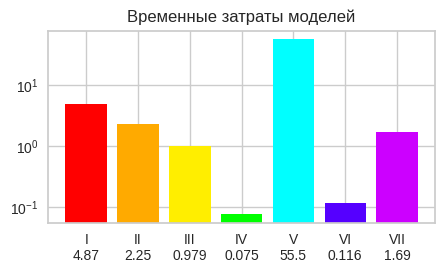

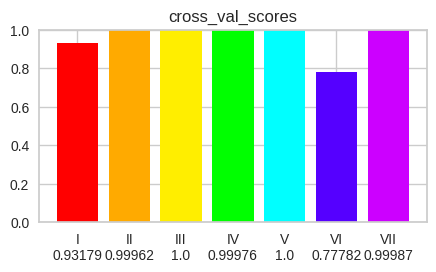

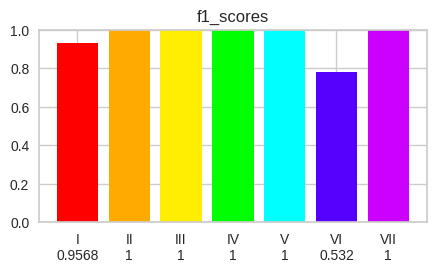

In [351]:
groups = ["I\n{}".format(round(time[0], 3)), 
          "II\n{}".format(round(time[1], 3)),
          "III\n{}".format(round(time[2], 3)),
          "IV\n{}".format(round(time[3], 3)),
          "V\n{}".format(round(time[4], 3)),
          "VI\n{}".format(round(time[5], 3)),
          "VII\n{}".format(round(time[6], 3))]
colors = ["#F00", "#FA0", "#FE0", "#0F0", "#0FF", "#50F", "#C0F"]
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.set_yscale('log')
plt.bar(groups, time, color=colors)
plt.title("Временные затраты моделей")
plt.show()

groups = ["I\n{}".format(round(cross_val_scores[0], 5)), 
          "II\n{}".format(round(cross_val_scores[1], 5)),
          "III\n{}".format(round(cross_val_scores[2], 5)),
          "IV\n{}".format(round(cross_val_scores[3], 5)),
          "V\n{}".format(round(cross_val_scores[4], 5)),
          "VI\n{}".format(round(cross_val_scores[5], 5)),
          "VII\n{}".format(round(cross_val_scores[6], 5))]

fig, ax = plt.subplots(figsize=(5, 2.5))
plt.ylim(ymax = 1, ymin = 0)
plt.bar(groups, cross_val_scores, color=colors)
plt.title("cross_val_scores")
plt.show()

groups = ["I\n{}".format(round(f1_scores[0], 5)), 
          "II\n{}".format(round(f1_scores[1], 5)),
          "III\n{}".format(round(f1_scores[2], 5)),
          "IV\n{}".format(round(f1_scores[3], 5)),
          "V\n{}".format(round(f1_scores[4], 5)),
          "VI\n{}".format(round(f1_scores[5], 5)),
          "VII\n{}".format(round(f1_scores[6], 5))]

fig, ax = plt.subplots(figsize=(5, 2.5))
plt.ylim(ymax = 1, ymin = 0)
plt.bar(groups, cross_val_scores, color=colors)
plt.title("f1_scores")
plt.show()

In [337]:
pd.DataFrame.from_dict({"Модель": models, "Время обучения": time, "f1-score": f1_scores, "cross_val_score": cross_val_scores})

,Модель,Время обучения,f1-score,cross_val_score
0,I,4.870,0.9568,0.931793
1,II,2.250,1.0000,0.999620
2,III,0.979,1.0000,1.000000
3,IV,0.075,1.0000,0.999761
4,V,55.500,1.0000,1.000000
5,VI,0.116,0.5320,0.777824
6,VII,1.690,1.0000,0.999874


# 7. Итоговый результат

**Наименьшее время обучения показали модели III, IV и VI.**\
**Наибольшие значения f1_score — у моделей II, III, IV, V и VII**.\
**Наибольшие значения cross_val_score — у моделей III и V.**\
**Модель III имеет метрики f1_score и cross_val_score, равные единице и время обучения 979 мс. В матрице ошибок модели III все значения вне главной диагонали равны нулю.**\
**Следовательно, оптимальным будет использование модели III (метод опорных векторов).**
